<a href="https://colab.research.google.com/github/guggg/titanic-analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [34]:
import pandas as pd
import numpy as np

### 透過 google drive 吃檔案
# test = 'https://drive.google.com/file/d/1xYq21Ia5bxHLLJ-JVp9IsXdtvdmVLNQ5/view?usp=sharing'
# train = 'https://drive.google.com/file/d/1eEnbJlNXgV6yF5Hg3-FGjJ8ncW9jMl4l/view?usp=sharing'
# testId = '1xYq21Ia5bxHLLJ-JVp9IsXdtvdmVLNQ5'
# trainId = '1eEnbJlNXgV6yF5Hg3-FGjJ8ncW9jMl4l'

# downloaded = drive.CreateFile({'id':testId}) # replace the id with id of file you want to access
# downloaded.GetContentFile('test.csv')  
# df_test = pd.read_csv('test.csv') 

# downloaded = drive.CreateFile({'id':trainId}) # replace the id with id of file you want to access
# downloaded.GetContentFile('train.csv')
# df_train = pd.read_csv('train.csv')


### 透過 github上傳檔案 用指的方式
test_csv_url = 'https://raw.githubusercontent.com/guggg/titanic-analysis/main/titanic/test.csv'
train_csv_url = 'https://raw.githubusercontent.com/guggg/titanic-analysis/main/titanic/train.csv'

df_test = pd.read_csv(test_csv_url)
df_train = pd.read_csv(train_csv_url)

In [ ]:
print(df_train.columns)
print(df_test.columns)

# 找到不一樣的欄位
print(set(df_train.columns) - set(df_test.columns))

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['Sex'] = labelencoder.fit_transform(df_train['Sex'])

In [ ]:
# 找missing_value
df_train.info()
df_train.isnull().any()

# 補missing_value
df_train_imputed = df_train.fillna(0)
df_train.fillna(df_train.median())

In [46]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df_train_dum = pd.get_dummies(df_train, columns=['Embarked'])
df_train_dum.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [ ]:
# 熱地圖 查看欄位correlation
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = False)

sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    cbar_kws={'shrink': 0.9},
    ax = plt.subplots(figsize=(12,10))[1],
    annot = True,
    annot_kws = {'fontsize': 12}
)

Feature: 0, Score: 0.00036
Feature: 1, Score: -0.15734
Feature: 2, Score: 0.00001
Feature: 3, Score: -0.01504
Feature: 4, Score: -0.03431
Feature: 5, Score: -0.00256
Feature: 6, Score: -0.53021


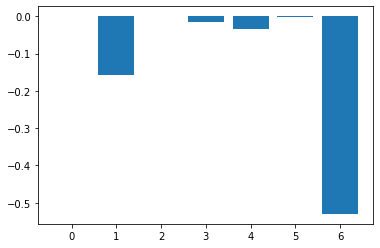

In [33]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

df_train_imputed['Sex'] = labelencoder.fit_transform(df_train_imputed['Sex'])

columns_x = {'Pclass', 'Age', 'PassengerId', 'Fare', 'Parch', 'SibSp', 'Sex'}
columns_y = ['Survived']

train_X = df_train_imputed.loc[:800, columns_x]
train_y = df_train_imputed.loc[:800, columns_y]

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# print(X, y)
model = LinearRegression()


model.fit(train_X, train_y)
# model.fit(X,y)
importance = model.coef_
# print(importance)

for i, v in enumerate(importance[0]):
  print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance[0]))], importance[0])
pyplot.show()

In [ ]:
# columns_x = set(df_train.columns) - {'Survived'}
columns_x = {'Pclass', 'Age', 'PassengerId', 'Fare', 'Parch', 'SibSp', 'Sex'}
columns_y = ['Survived']

# 切分訓練資料、測試資料
train_X = df_train_imputed.loc[:800, columns_x]
train_y = df_train_imputed.loc[:800, columns_y]
valid_X = df_train_imputed.loc[800:, columns_x]
valid_y = df_train_imputed.loc[800:, columns_y]
# print(train_X.shape)
# print(train_y.shape)
# print(valid_X.shape)
# print(valid_y.shape)

In [ ]:
# sklearn切法
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(df_train[columns_x], df_train[columns_y], train_size = .7)

In [ ]:
# sklearn 訓練
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0)
log.fit(train_X, train_y)
pred_y = log.predict(valid_X)

In [ ]:
# score = round(log.score(train_X, train_y) * 100 , 2)

from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state = 0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(), cv=5, scoring='accuracy')
scores

array([0.79503106, 0.775     , 0.79375   , 0.7625    , 0.7875    ])